#1. Feature Extraction

In [ ]:
#use the model to predict and store the output 4096 dimensional vector output to a text file
if path.exists(feature_path) == False:
    os.mkdir(feature_path)

for type in face_types:

  if (type == '.DS_Store'):
      continue

  all_faces = os.listdir(data_path + '/' + type)

  for face in all_faces:

    if (face == '.DS_Store'):
      continue

    img_path = str(data_path + '/' + type + '/' + face)
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)

    features = model.predict(x) #features is the 4096 dimensional vector
    print(features.shape) #(1, 4096)
    print(features)

    type_path = str(feature_path + '/' + type)
    if path.exists(type_path) == False:
      os.mkdir(type_path)

    filename = str(feature_path + '/' + type + '/' + face + '.txt')
     #saving the feature vector a text file
    with open(filename,"w") as f:
      Array = np.array(features)
      np.savetxt(filename,Array)

1/1 [==============================] - 1s 885ms/step
(1, 4096)
[[1.3299240e-23 2.5975960e-22 1.4379074e-17 ... 2.2839909e-11
  3.7435866e-18 2.6188448e-32]]
1/1 [==============================] - 1s 539ms/step
(1, 4096)
[[4.7294646e-26 1.1239932e-19 1.2265720e-23 ... 2.9466646e-06
  7.7439019e-22 1.3406199e-31]]
1/1 [==============================] - 1s 941ms/step
(1, 4096)
[[3.6195425e-17 1.6869975e-17 8.3841530e-18 ... 3.8083839e-10
  5.7781458e-17 4.1858090e-30]]
1/1 [==============================] - 1s 994ms/step
(1, 4096)
[[1.3232242e-29 1.4275868e-26 1.2000888e-15 ... 3.9470320e-05
  8.0642989e-17 2.3948514e-30]]


KeyboardInterrupt: ignored

#2. Computing similarity scores

In [ ]:
#function to compute normalised cosine similarity score
def similarity(A, B):
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return cosine

In [ ]:
#loop to compute the number of faces in each category
for i in range(0,len(face_types)):
  faces_in_category.append(0)

print(len(faces_in_category))

for type in face_types:
  
  if (type == '.DS_Store'):
    continue

  all_faces = os.listdir(data_path + '/' + type)
  faces_in_category[int(type)-1] = len(all_faces)


200


Genuine Attempts

In [ ]:
#loop to compute all the pairs for genuine attempts
for type in face_types:

  if (type == '.DS_Store'):
    continue

  all_faces = os.listdir(data_path + '/' + type)

  for i in range(0,len(all_faces)-1):
    for j in range(i+1,len(all_faces)):
      if(i==j):
        continue
      if(all_faces[i]=='.DS_Store'):
        continue
      if(all_faces[j]=='.DS_Store'):
        continue
      genuine_attempts[int(type)-1].append((all_faces[i],all_faces[j]))

In [ ]:
#creating directory for storing similarity score
if path.exists(SS_path) == False:
  os.mkdir(SS_path)

#creating directory for storing genuine similarity score
if path.exists(genuine_path) == False:
  os.mkdir(genuine_path)

#creating directory for storing imposter similarity score
if path.exists(imposter_path) == False:
  os.mkdir(imposter_path)

In [ ]:
#computing the similarity scores for the genuine pairs and storing it to a text file 
for type in range(0, len(face_types)):
  
  pair_list = genuine_attempts[type]
  
  for pair in pair_list:

    file1 = str(FV_path + '/' + str(type+1) + "/" + str(pair[0]) + '.txt')
    file2 = str(FV_path + '/' + str(type+1) + "/" + str(pair[1]) + '.txt')

    #loading feature vectors from the files
    FV1 = np.loadtxt(file1,dtype=float)
    FV2 = np.loadtxt(file2,dtype=float)

    #invoking the function to compute similarity score
    similarity_score = similarity(FV1, FV2)

    type_save_path = str(genuine_path + '/' + str(type+1))

    if path.exists(type_save_path) == False:
      os.mkdir(type_save_path)
    
    #writing the similarity score to a text file
    save_score_file= str(type_save_path + '/' + str(pair[0]) + '_' + str(pair[1]) + '.txt')
    with open(save_score_file,"w") as f:
      f.write(str(similarity_score))

In [ ]:
#loop for calcutaing the number of genuine attempts which have a similarity score greater than threshold
for iteration in range(0,101):

  threshold = iteration / 100
  current_count = 0

  for type in face_types:
    type_scores = os.listdir(SS_path + '/' + 'genuine' + '/' + str(type))
    for score_file in type_scores:
      filename = SS_path + '/' + 'genuine' + '/' + str(type) + '/' + score_file
      with open(filename,'r') as f:
        score = float(f.read())
        if (score >= threshold):
          current_count = current_count + 1

  num_of_genuine_passed.append((current_count,threshold))

In [ ]:
#calculating the total number of genuine attempts
for i in range(0, len(face_types)):
  total_genuine_attempts = total_genuine_attempts + len(genuine_attempts[i])

In [ ]:
print(total_genuine_attempts)

1200


In [ ]:
#computing the GAR values for a particular threshold
for num_passed_tuple in num_of_genuine_passed:
  
  num = num_passed_tuple[0]
  threshold = num_passed_tuple[1]

  GAR = num / total_genuine_attempts

  GARs.append((GAR, threshold))

In [ ]:
#computing the FRR values for a particular threshold
for GAR_tuple in GARs:
  GAR = GAR_tuple[0]
  threshold = GAR_tuple[1]
  
  FRR = 1 - GAR

  FRRs.append((FRR, threshold))

In [ ]:
print(GARs)

[(1.0, 0.0), (0.4483333333333333, 0.01), (0.4083333333333333, 0.02), (0.38666666666666666, 0.03), (0.37083333333333335, 0.04), (0.35583333333333333, 0.05), (0.3466666666666667, 0.06), (0.33666666666666667, 0.07), (0.33, 0.08), (0.325, 0.09), (0.32083333333333336, 0.1), (0.3125, 0.11), (0.3075, 0.12), (0.30583333333333335, 0.13), (0.3025, 0.14), (0.3016666666666667, 0.15), (0.29583333333333334, 0.16), (0.2916666666666667, 0.17), (0.29083333333333333, 0.18), (0.28583333333333333, 0.19), (0.2825, 0.2), (0.2758333333333333, 0.21), (0.2733333333333333, 0.22), (0.2708333333333333, 0.23), (0.2708333333333333, 0.24), (0.2683333333333333, 0.25), (0.26666666666666666, 0.26), (0.26416666666666666, 0.27), (0.2625, 0.28), (0.26166666666666666, 0.29), (0.2608333333333333, 0.3), (0.25916666666666666, 0.31), (0.255, 0.32), (0.2525, 0.33), (0.2475, 0.34), (0.2475, 0.35), (0.2475, 0.36), (0.24416666666666667, 0.37), (0.24333333333333335, 0.38), (0.24166666666666667, 0.39), (0.24083333333333334, 0.4), (0

Imposter attempts

In [ ]:
#loop to compute all the pairs for imposter attempts
for i in range(0,len(face_types)-1):

  all_faces1 = os.listdir(data_path + '/' + str(i+1))

  for j in range(i+1,len(face_types)):
    
    all_faces2 = os.listdir(data_path + '/' + str(j+1))

    for m in range(0,len(all_faces1)):
      for n in range(0,len(all_faces2)):
        if(all_faces1[m]=='.DS_Store'):
          continue
        if(all_faces2[n]=='.DS_Store'):
          continue
        imposter_attempts[i].append((all_faces1[m],all_faces2[n]))

In [ ]:
#calculating the total number of imposter attempts
for i in range(0, len(face_types)):
  total_imposter_attempts = total_imposter_attempts + len(imposter_attempts[i])

In [ ]:
#helper function to extract the face type for a particular file
def extractType(pairName):
  splitString = pairName.split('-')
  return splitString[0]

In [ ]:
#computing the similarity scores for the imposter pairs and storing it to a text file 
for type in range(0, len(face_types)):
  
  pair_list = imposter_attempts[type]
  
  for pair in pair_list:

    file1 = str(FV_path + '/' + str(type+1) + "/" + str(pair[0]) + '.txt')
    file2 = str(FV_path + '/' + str(extractType(pair[1])) + "/" + str(pair[1]) + '.txt')

    #loading feature vectors from the files
    FV1 = np.loadtxt(file1,dtype=float)
    FV2 = np.loadtxt(file2,dtype=float)

    #invoking the function to compute similarity score
    similarity_score = similarity(FV1, FV2)

    type_save_path = str(imposter_path + '/' + str(type+1))

    if path.exists(type_save_path) == False:
      os.mkdir(type_save_path)

    #writing the similarity score to a text file
    save_score_file= str(type_save_path + '/' + str(pair[0]) + '_' + str(pair[1]) + '.txt')
    with open(save_score_file,"w") as f:
      f.write(str(similarity_score))

In [ ]:
#loop for calcutaing the number of imposter attempts which have a similarity score greater than threshold
for iteration in range(0,101):

  threshold = iteration / 100
  current_count = 0

  for type in range(1, len(face_types)-1):
    type_scores = os.listdir(imposter_path + '/' + str(type))
    for score_file in type_scores:
      filename = imposter_path + '/' + str(type) + '/' + score_file
      with open(filename,'r') as f:
        score = float(f.read())
        if (score >= threshold):
          current_count = current_count + 1

  num_of_imposter_passed.append((current_count,threshold))

In [ ]:
#computing the FAR values for a particular threshold
for num_passed_tuple in num_of_imposter_passed:
  
  num = num_passed_tuple[0]
  threshold = num_passed_tuple[1]

  FAR = num / total_imposter_attempts

  FARs.append((FAR, threshold))

In [ ]:
#computing the GRR values for a particular threshold
for FAR_tuple in GARs:
  FAR = FAR_tuple[0]
  threshold = FAR_tuple[1]
  
  GRR = 1 - FAR

  GRRs.append((GRR, threshold))

In [ ]:
print(FARs)

[(0.9999497487437186, 0.0), (0.1748146984924623, 0.01), (0.14951005025125627, 0.02), (0.13659547738693467, 0.03), (0.12864321608040202, 0.04), (0.12262248743718593, 0.05), (0.11774811557788945, 0.06), (0.11186871859296482, 0.07), (0.10722361809045226, 0.08), (0.10342336683417086, 0.09), (0.0995037688442211, 0.1), (0.09451947236180905, 0.11), (0.09264133165829146, 0.12), (0.09143844221105528, 0.13), (0.08787374371859297, 0.14), (0.08701947236180904, 0.15), (0.08583542713567839, 0.16), (0.08465452261306533, 0.17), (0.08320665829145729, 0.18), (0.08187185929648241, 0.19), (0.08120288944723618, 0.2), (0.07946293969849247, 0.21), (0.07892902010050251, 0.22), (0.07782663316582915, 0.23), (0.07733354271356783, 0.24), (0.07691268844221105, 0.25), (0.0760929648241206, 0.26), (0.07562814070351759, 0.27), (0.07424937185929648, 0.28), (0.07386306532663317, 0.29), (0.07339824120603015, 0.3), (0.07209484924623115, 0.31), (0.07064698492462311, 0.32), (0.07031721105527639, 0.33), (0.06924937185929649,

In [ ]:
print(total_imposter_attempts)

318400


#3. Biometric Evaluation

DET graph

In [ ]:
#computing the x-coordinates for DET values
for i in range(0, len(FARs)):
  DET_x.append(FARs[i][0]*100)

#computing the y-coordinates for DET values
for i in range(0, len(FRRs)):
  DET_y.append(FRRs[i][0])

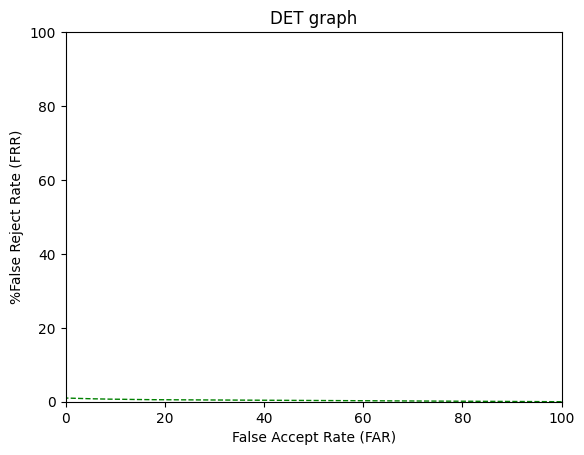

In [ ]:
plt.plot(DET_x, DET_y, color='green', linestyle='dashed', linewidth = 1)
  
#setting x and y axis range
plt.ylim(0,100)
plt.xlim(0,100)
  
#naming the x axis
plt.xlabel('False Accept Rate (FAR)')
#naming the y axis
plt.ylabel('%False Reject Rate (FRR)')
  
#giving a title to the graph
plt.title('DET graph')
  
#function to show the plot
plt.show()

ROC graph

In [ ]:
#computing the x-coordinates for ROC values
for i in range(0, len(FARs)):
  ROC_x.append(FARs[i][0]*100)

#computing the y-coordinates for ROC values
for i in range(0, len(GARs)):
  ROC_y.append(GARs[i][0])

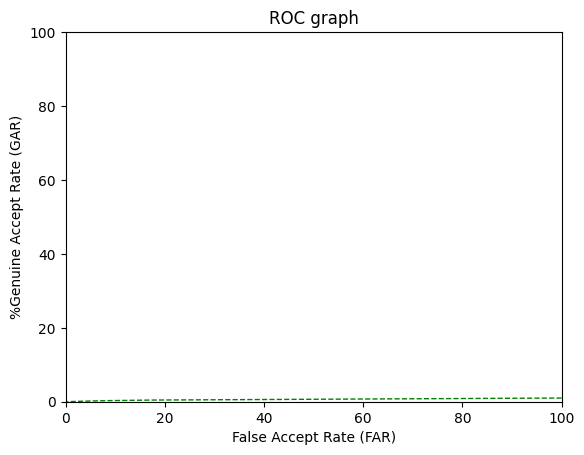

In [ ]:
plt.plot(ROC_x, ROC_y, color='green', linestyle='dashed', linewidth = 1)
  
#setting x and y axis range
plt.ylim(0,100)
plt.xlim(0,100)
  
#naming the x axis
plt.xlabel('False Accept Rate (FAR)')
#naming the y axis
plt.ylabel('%Genuine Accept Rate (GAR)')
  
#giving a title to the graph
plt.title('ROC graph')
  
#function to show the plot
plt.show()

EER

In [ ]:
#loop to store all the FAR values to a list
for i in range(0, 101):
  FAR_vals.append(FARs[i][0])

#loop to store all the FRR values to a list
for i in range(0, 101):
  FRR_vals.append(FRRs[i][0])

#loop to store all the possible threshold values to a list
for i in range(0,101):
  threshold = i / 100
  threshold_vals.append(threshold)

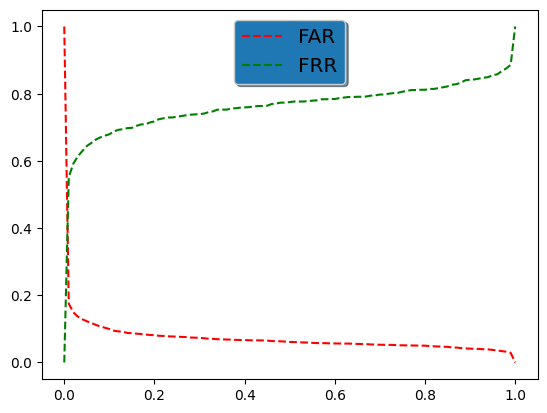

In [ ]:
plt.plot(threshold_vals, FAR_vals, 'r--', label='FAR')
plt.plot(threshold_vals, FRR_vals, 'g--', label='FRR') 

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

#put a background color on the legend.
legend.get_frame().set_facecolor('C0')

#function to show the plot
plt.show()

Distribution of scores by attempt type

In [ ]:
#calculating the number of genuine and imposter attempts for every score value
for i in range(0, 101):
  imposter_comparisons.append(0)
  genuine_comparisons.append(0)
  scores.append(i / 100)

#genuine attempts
genuine_types = os.listdir(genuine_path)

for type in genuine_types:

  all_scores = os.listdir(genuine_path + '/' + type)

  for scoreFile in all_scores:
    filename = genuine_path + '/' + type + '/' + scoreFile
    with open(filename,'r') as f:
      score = float(f.read())
      score_val = int(score * 100)
      genuine_comparisons[score_val] += 1

#imposter attempts
imposter_types = os.listdir(imposter_path)

for type in imposter_types:

  all_scores = os.listdir(imposter_path + '/' + type)

  for scoreFile in all_scores:
    filename = imposter_path + '/' + type + '/' + scoreFile
    with open(filename,'r') as f:
      score = float(f.read())
      score_val = int(score * 100)
      imposter_comparisons[score_val] += 1

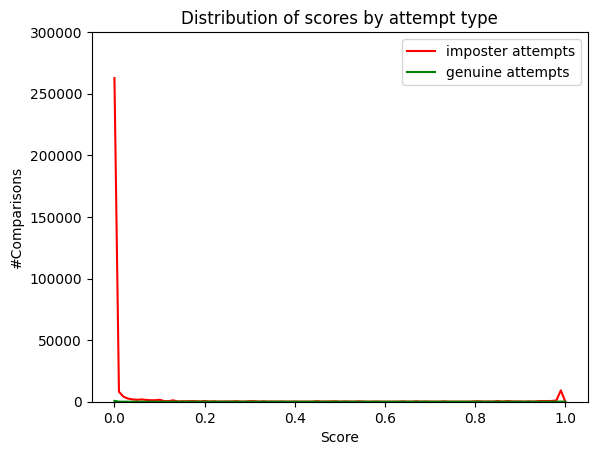

In [ ]:
#plotting both the curves simultaneously
plt.plot(scores, imposter_comparisons, color='r', label='imposter attempts')
plt.plot(scores, genuine_comparisons, color='g', label='genuine attempts')
  
#naming the x-axis, y-axis and the whole graph
plt.xlabel("Score")
plt.ylabel("#Comparisons")
plt.title("Distribution of scores by attempt type")

plt.ylim(0,300000)
  
#adding legend, which helps us recognize the curve according to its color
plt.legend()
  
#to load the display window
plt.show()